In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import community
import numpy as np

from math import ceil
from collections import defaultdict

In [2]:
G = nx.read_gexf('graphs/graph.gexf')

In [3]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 713
Number of edges: 581


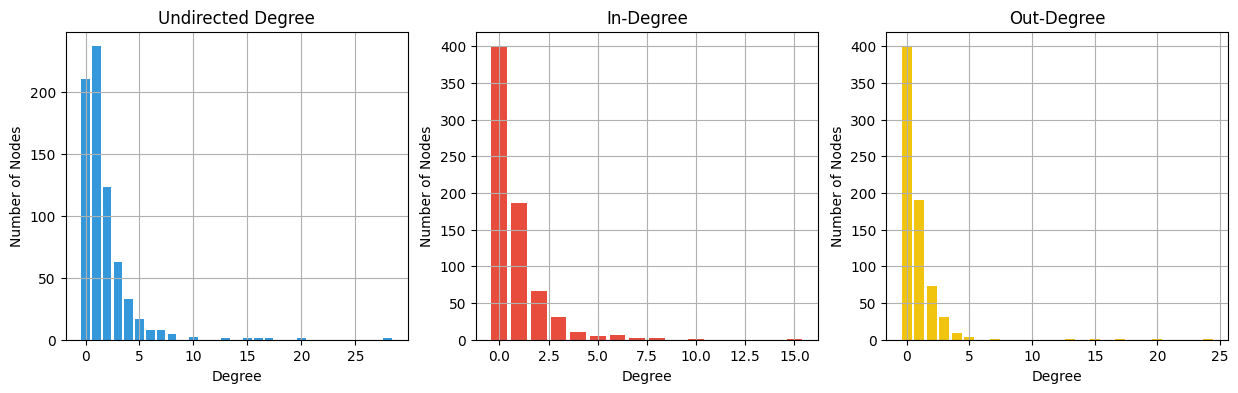

In [4]:
deg_hist = nx.degree_histogram(G.to_undirected())
in_deg_hist = [0] * (max(dict(G.in_degree()).values()) + 1)
out_deg_hist = [0] * (max(dict(G.out_degree()).values()) + 1)

for _, d in G.in_degree():
    in_deg_hist[d] += 1

for _, d in G.out_degree():
    out_deg_hist[d] += 1

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].bar(range(len(deg_hist)), deg_hist, color='#3498db', label='Undirected Degree (Blue)')
ax[1].bar(range(len(in_deg_hist)), in_deg_hist, color='#e74c3c', label='In-Degree (Red)')
ax[2].bar(range(len(out_deg_hist)), out_deg_hist, color='#f1c40f', label='Out-Degree (Yellow)')

titles = ['Undirected Degree', 'In-Degree', 'Out-Degree']

for titles_idx, ax_ in enumerate(ax):
    ax_.set_xlabel("Degree")
    ax_.set_ylabel("Number of Nodes")
    ax_.set_title(titles[titles_idx])
    # ax_.legend()
    ax_.grid(True)
plt.show()

In [5]:
degrees = dict(G.degree())
most_connected_node = max(degrees, key=degrees.get)
print(f"Most connected node: {most_connected_node}, Degree: {degrees[most_connected_node]}")

Most connected node: Theorem 30.23, Degree: 28


In [6]:
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# print("In-degrees of nodes:", in_degrees)
# print("Out-degrees of nodes:", out_degrees)

most_influential_node = max(in_degrees, key=in_degrees.get)
print(f"Most influential node (highest in-degree): {most_influential_node}, In-degree: {in_degrees[most_influential_node]}")

most_active_node = max(out_degrees, key=out_degrees.get)
print(f"Most active node (highest out-degree): {most_active_node}, Out-degree: {out_degrees[most_active_node]}")

Most influential node (highest in-degree): Theorem 11.12, In-degree: 15
Most active node (highest out-degree): Theorem 30.23, Out-degree: 24


In [7]:
connected_components = list(nx.connected_components(G.to_undirected()))
print("Number of connected components:", len(connected_components))
# print("Sizes of connected components:", [len(c) for c in connected_components])

Number of connected components: 242


In [8]:
# Strongly connected components
strongly_connected = list(nx.strongly_connected_components(G))
print("Number of strongly connected components:", len(strongly_connected))

# Weakly connected components
weakly_connected = list(nx.weakly_connected_components(G))
print("Number of weakly connected components:", len(weakly_connected))

Number of strongly connected components: 713
Number of weakly connected components: 242


In [9]:
try:
    avg_shortest_path_length = nx.average_shortest_path_length(G)
    print(f"Average shortest path length: {avg_shortest_path_length}")
except nx.NetworkXError:
    print("Graph is not strongly connected; cannot compute average shortest path length.")

Graph is not strongly connected; cannot compute average shortest path length.


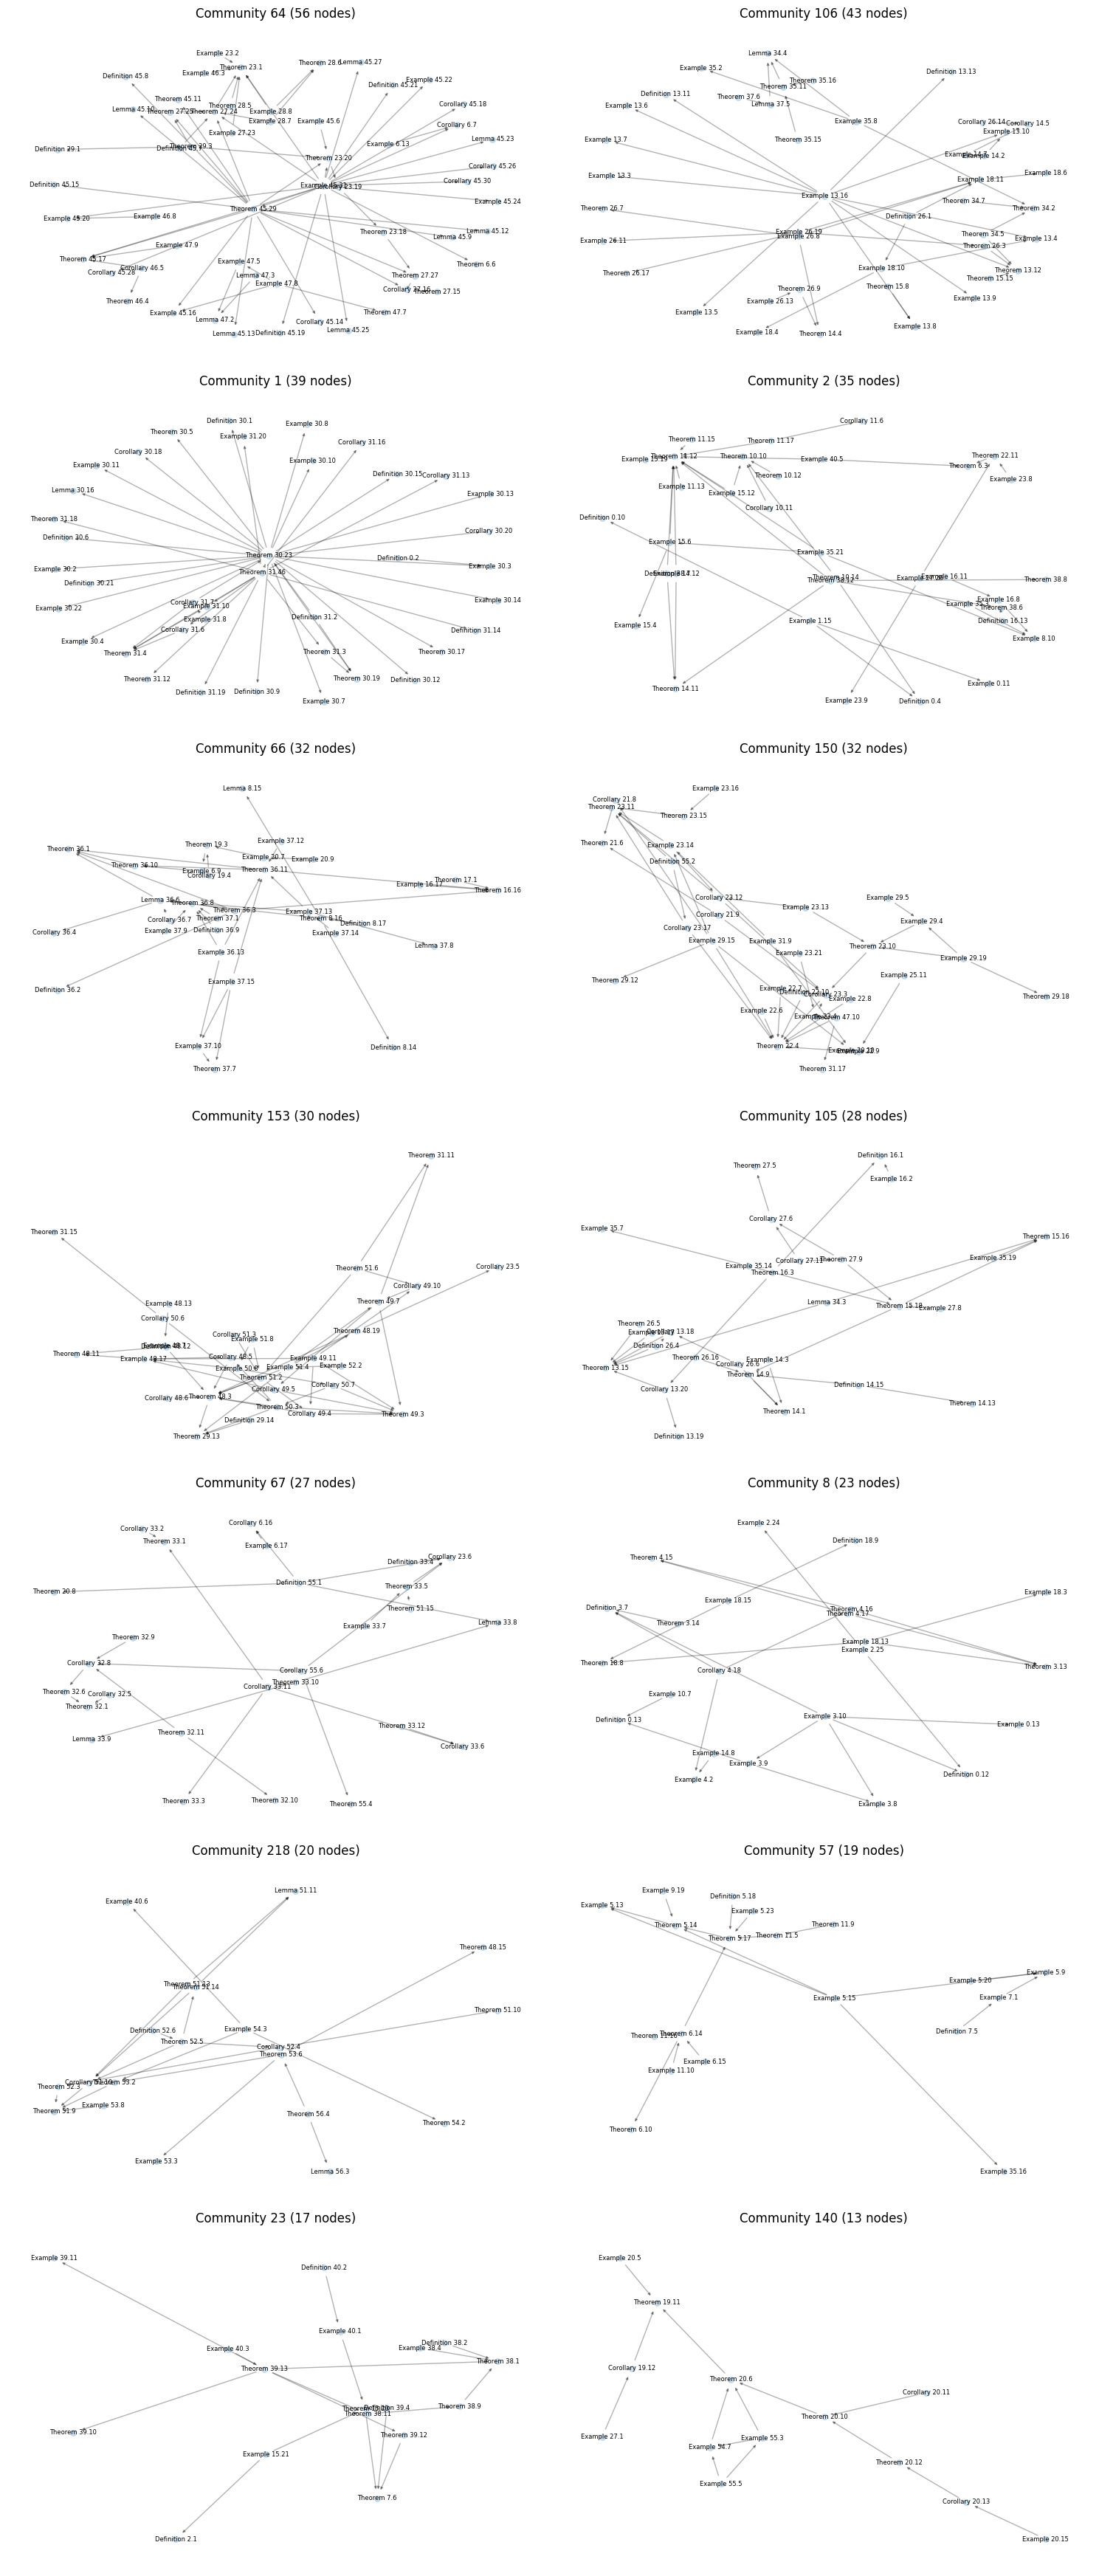

In [10]:
partition = community.best_partition(G.to_undirected())

communities = defaultdict(list)
for node, comm_id in partition.items():
    communities[comm_id].append(node)

sorted_communities = sorted(communities.items(), key=lambda x: -len(x[1]))

min_community_size = 10

sorted_communities = [x for x in sorted_communities if len(x[1]) > min_community_size]

num_comms = len(sorted_communities)
cols = 2
rows = ceil(num_comms / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows)) # figsize=(5 * cols, 5 * rows)
axes = axes.flatten()

for i, (comm_id, nodes) in enumerate(sorted_communities):
    subgraph = G.subgraph(nodes)
    pos = nx.spring_layout(subgraph, seed=42, k=0.3)

    ax = axes[i]
    nx.draw_networkx_nodes(subgraph, pos, ax=ax, node_size=30, alpha=0.2)
    nx.draw_networkx_edges(subgraph, pos, ax=ax, alpha=0.3, arrowsize=5)
    nx.draw_networkx_labels(subgraph, pos, ax=ax, font_size=6)

    ax.set_title(f"Community {comm_id} ({len(nodes)} nodes)")
    ax.axis('off')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

/tmp/ipykernel_3618/3689198948.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


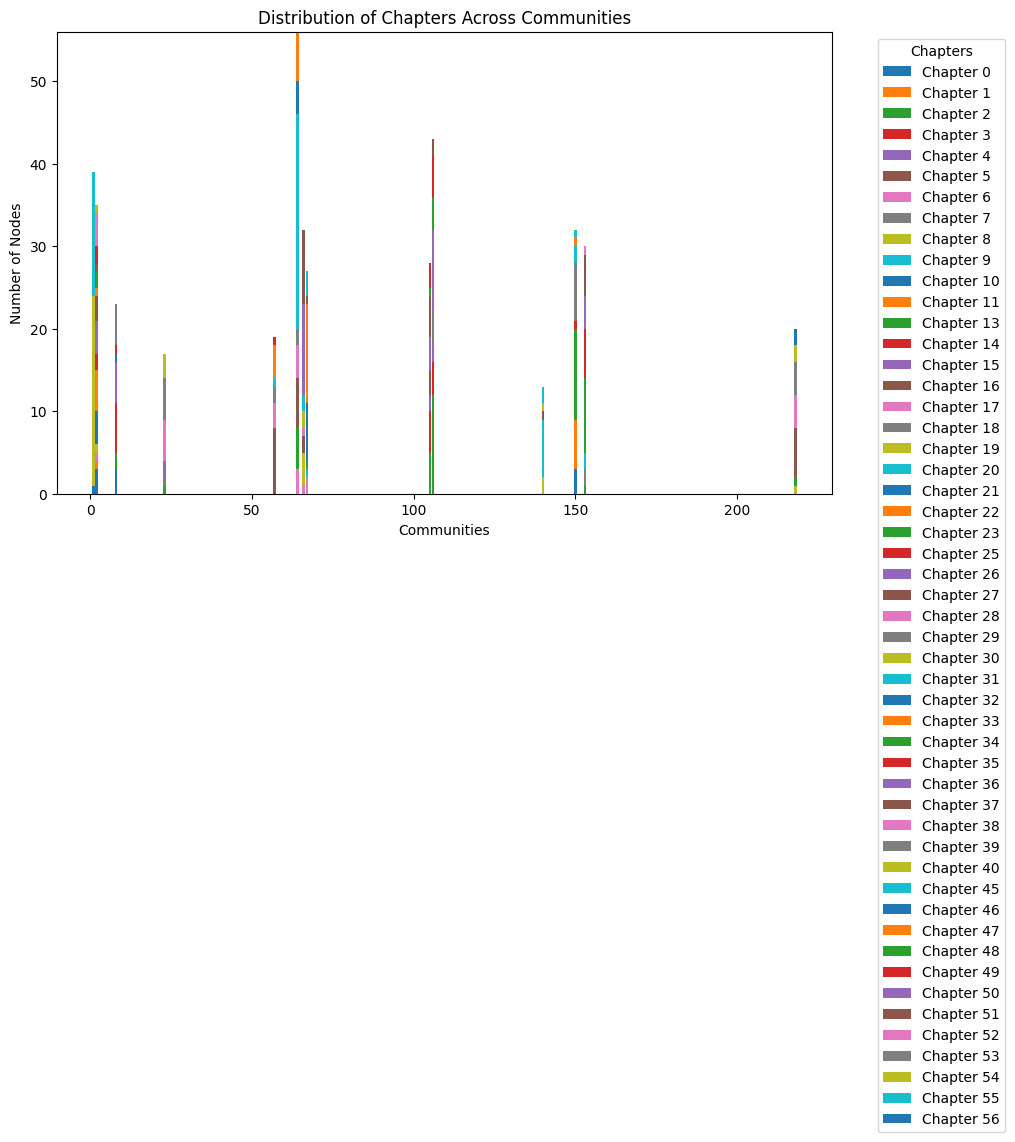

In [ ]:
communities = dict(sorted_communities)

def get_chapter_name(node):
    return int(node.split(' ')[-1].split('.')[0])

chapter_counts = defaultdict(lambda: defaultdict(int))
for community, nodes in communities.items():
    for node in nodes:
        chapter = get_chapter_name(node)
        chapter_counts[community][chapter] += 1

# Step 2: Prepare data for plotting
communities_list = list(chapter_counts.keys())
chapters = sorted(set(chapter for counts in chapter_counts.values() for chapter in counts))
data = {community: [chapter_counts[community].get(chapter, 0) for chapter in chapters] for community in communities_list}

# Step 3: Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bottom values for stacking
bottom = np.zeros(len(communities_list))

for i, chapter in enumerate(chapters):
    values = [data[community][i] for community in communities_list]
    ax.bar(communities_list, values, label=f"Chapter {chapter}", bottom=bottom)
    bottom += values

# Add labels and legend
ax.set_title("Distribution of Chapters Across Communities")
ax.set_xlabel("Communities")
ax.set_ylabel("Number of Nodes")
ax.legend(title="Chapters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3618/3844218387.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


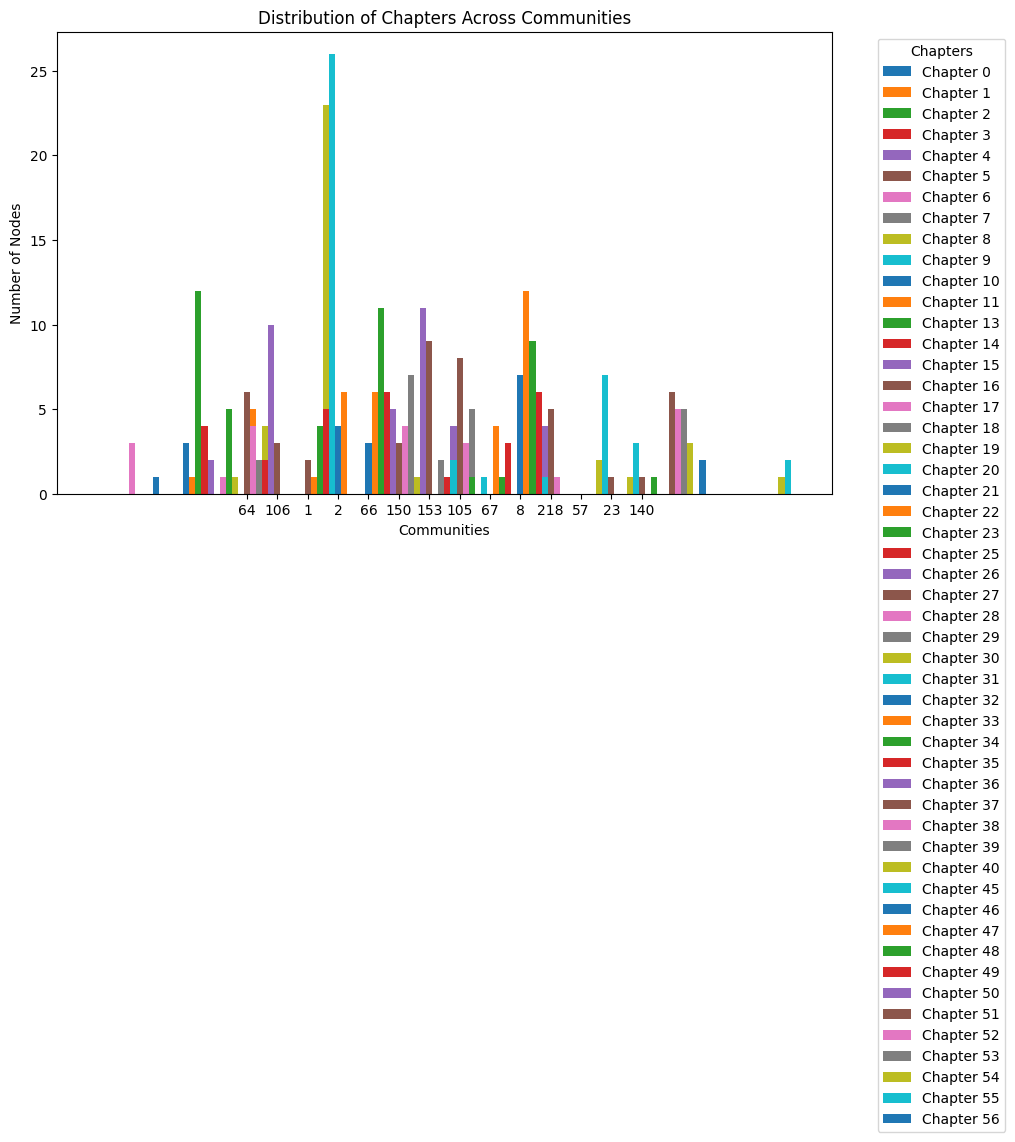

In [18]:
bar_width = 0.2
indices = np.arange(len(communities_list))

fig, ax = plt.subplots(figsize=(10, 6))

for i, chapter in enumerate(chapters):
    values = [data[community][i] for community in communities_list]
    ax.bar(indices + i * bar_width, values, bar_width, label=f"Chapter {chapter}")

# Add labels and legend
ax.set_title("Distribution of Chapters Across Communities")
ax.set_xlabel("Communities")
ax.set_ylabel("Number of Nodes")
ax.set_xticks(indices + bar_width * (len(chapters) - 1) / 2)
ax.set_xticklabels(communities_list)
ax.legend(title="Chapters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

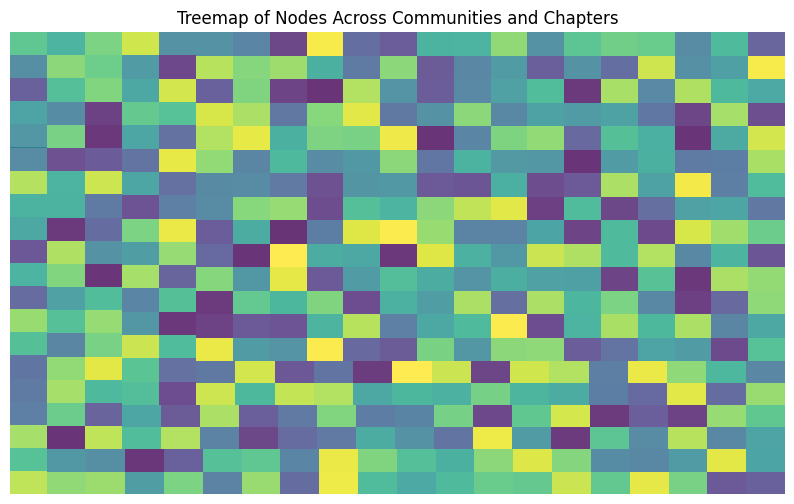

In [ ]:
import squarify  # pip install squarify

# Flatten the data for treemap
treemap_data = []
labels = []
for community, nodes in communities.items():
    for node in nodes:
        chapter = get_chapter_name(node)
        treemap_data.append(1)  # Each node contributes 1 unit
        labels.append(f"{community}\nChapter {chapter}")

# Plot treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=treemap_data, label=labels, alpha=0.8)
plt.axis('off')
plt.title("Treemap of Nodes Across Communities and Chapters")
plt.show()